<a href="https://colab.research.google.com/github/Fres02/Machine-Learning-Projects/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1 : Importing Required Libraries**



In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## **Step 2 : Load Dataset**

In [39]:
# Load exercise data
exercise_data = pd.read_csv('./Exercise.csv')
print("Exercise Data:")
display(exercise_data.head())

Exercise Data:


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [42]:
# Load calories data
calories_data = pd.read_csv('./Calories.csv')
print("\nCalories Data:")
display(calories_data.head())


Calories Data:


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


## **Step 3 : Combine Datasets**

We need to combine these two datasets.

In [43]:
# Column wise concatanation
Calories_data = pd.concat([exercise_data, calories_data['Calories']], axis=1)

Display the combined dataset

In [44]:
Calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Here our target variable is Calories.

## **Step 4 : Analyze the Dataset**

In [45]:
# display the no. of rows and no. of columns
Calories_data.shape

(15000, 9)

In [46]:
# display more information about the dataset
print("\nDataset Info:")
Calories_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [47]:
print("\nSummary Statistics:")
display(Calories_data.describe())


Summary Statistics:


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [48]:
# checking for null values
Calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


There are no null values or missing values in this dataset.

In [49]:
# checking for duplicates
Calories_data.duplicated().sum()

0

There are no duplicate examples in this dataset.

## **Step 5 : Exploratory Data Analysis (EDA)**

Visualize the distribution of key variables and correlations.



In [50]:
# to add default aesthetic settings to plots
sns.set()

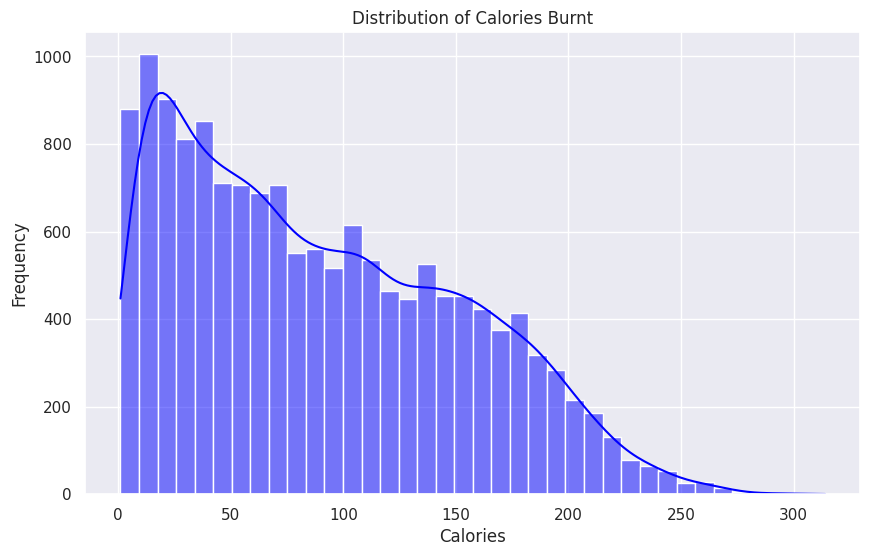

In [51]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(Calories_data['Calories'], kde=True, color='blue')
plt.title('Distribution of Calories Burnt')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='count', ylabel='Gender'>

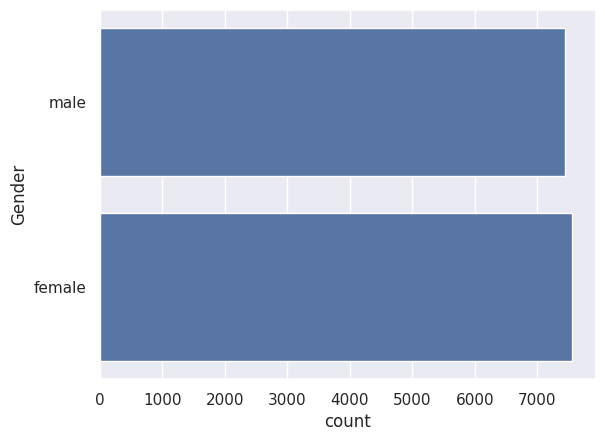

In [52]:
# plotting the Gender column
sns.countplot(Calories_data['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

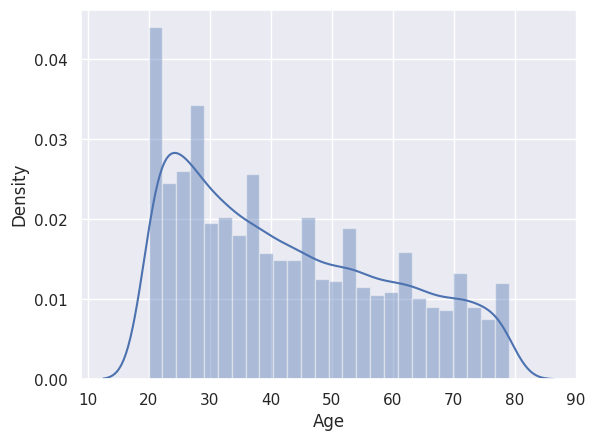

In [53]:
# distribution of Age column
sns.distplot(Calories_data['Age'])

<Axes: xlabel='Height', ylabel='Density'>

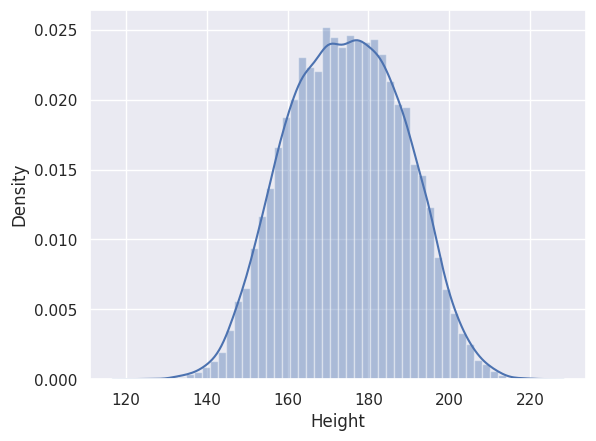

In [54]:
# distribution of Height column
sns.distplot(Calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Density'>

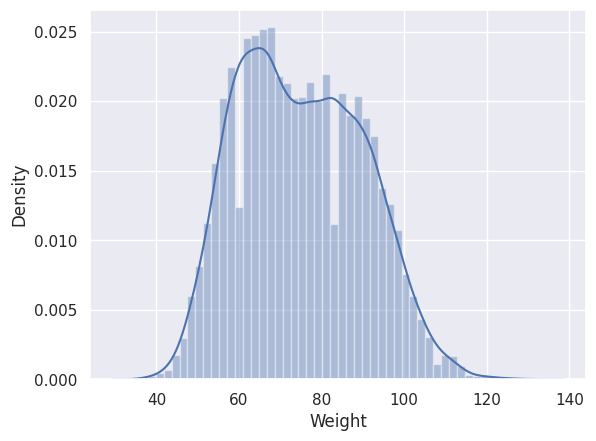

In [55]:
# distribution of Weight column
sns.distplot(Calories_data['Weight'])

In [56]:
Calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## **Step 6 : Data Preprocessing and Feature Selection**

There are


*   No null values
*   No duplicates





Categorical data should be handled.

In [57]:
print("\nDataset Info:")
Calories_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Since there is categorical data, in Gender field. It should be converted to a numerical value.




In [58]:
Calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [59]:
Calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Now there are only numerical values for all features

Plotting the Correlation Heat Map

In [60]:
correlation = Calories_data.corr()

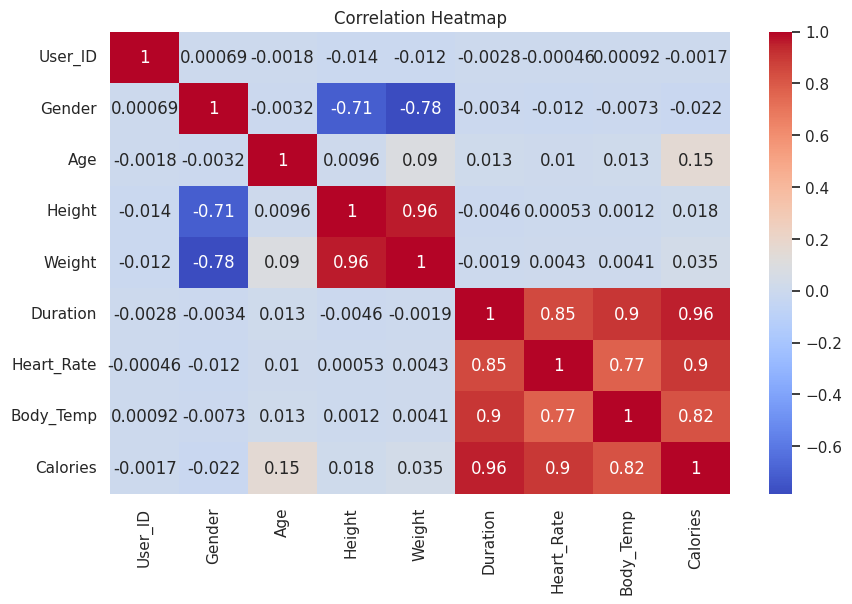

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(Calories_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Selection should be done

In [62]:
# Drop User_ID column since that is not useful for prediction.
Calories_data = Calories_data.drop(columns=['User_ID'])

In [63]:
Calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Seperate the Features and Target Variables

In [64]:
X = Calories_data.drop(columns=['Calories'])
y = Calories_data['Calories']

In [65]:
print("\nFeature Data After Preprocessing:")
display(X.head())


Feature Data After Preprocessing:


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


## **Step 7 :  Split Data into Train, Validation, and Test Sets**

In [69]:
# Split the data into training + validation (80%) and testing (20%) sets.
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Split the training + validation set into separate training (80%) and validation (20%) sets.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [72]:
# dilpay the shape of train, validation and test sets
print("\nTrain, Validation, and Test Data Shapes:")
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")


Train, Validation, and Test Data Shapes:
X_train: (9600, 7), X_val: (2400, 7), X_test: (3000, 7)
y_train: (9600,), y_val: (2400,), y_test: (3000,)


## **Step 8 : Model Training, Cross Validation and Evaluation**

### XGBoost Model

In [73]:
# Train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [74]:
# Predict on validation data
y_pred_xgb = xgb_model.predict(X_val)

In [92]:
# Evaluate XGBoost on validation data
print("\nXGBoost Model Evaluation (Validation Set):")
print(f"Mean Squared Error: {mean_squared_error(y_val, y_pred_xgb):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_val, y_pred_xgb):.2f}")
print(f"R^2 Score: {mean_absolute_error(y_val, y_pred_xgb):.2f}")


XGBoost Model Evaluation (Validation Set):
Mean Squared Error: 5.38
Mean Absolute Error: 1.58
R^2 Score: 1.58


In [81]:
# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
print(f"\nXGBoost Cross-Validation Mean Squared Error (CV=5): {np.mean(-cv_scores_xgb):.2f}")


XGBoost Cross-Validation Mean Squared Error (CV=5): 5.25


### Random Forrest Regressor

In [82]:
# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [83]:
# Predict on validation data
y_pred_rf = rf_model.predict(X_val)

In [84]:
# Evaluate Random Forest on validation data
print("\nRandom Forest Evaluation (Validation Set):")
print(f"Mean Squared Error: {mean_squared_error(y_val, y_pred_rf):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_val, y_pred_rf):.2f}")
print(f"R^2 Score: {r2_score(y_val, y_pred_rf):.2f}")


Random Forest Evaluation (Validation Set):
Mean Squared Error: 9.14
Mean Absolute Error: 1.89
R^2 Score: 1.00


In [85]:
cv_scores_rf = cross_val_score(rf_model, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
print(f"\nRandom Forest Cross-Validation Mean Squared Error (CV=5): {np.mean(-cv_scores_rf):.2f}")


Random Forest Cross-Validation Mean Squared Error (CV=5): 9.49


### **Based on the cross-validation mean squared error (MSE), XGBoost is the better model.**

XGBoost has a lower MSE (5.25) compared to Random Forest (9.49).
A lower MSE indicates that the model's predictions are closer to the actual values, meaning the XGBoost model has better predictive performance in terms of minimizing the error.

###  Evaluate Models on Test Set

In [89]:
# Predict on test data using XGBoost
y_pred_xgb_test = xgb_model.predict(X_test)

In [91]:
# Evaluate XGBoost on test data
print("\nXGBoost Model Evaluation (Test Set):")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb_test):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_xgb_test):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_xgb_test):.2f}")


XGBoost Model Evaluation (Test Set):
Mean Squared Error: 5.30
Mean Absolute Error: 1.59
R^2 Score: 1.00


In [86]:
# Predict on test data using Random Forest
y_pred_rf_test = rf_model.predict(X_test)

In [87]:
# Evaluate Random Forest on test data
print("\nRandom Forest Evaluation (Test Set):")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf_test):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf_test):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf_test):.2f}")


Random Forest Evaluation (Test Set):
Mean Squared Error: 8.34
Mean Absolute Error: 1.83
R^2 Score: 1.00


### Both models are performing extremely well, but based on the MSE and MAE, XGBoost is slightly better at making more accurate predictions on the test set, with lower error metrics.